In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [13]:
import pandas as pd
import numpy as np
from pyparsing import col

file = r"C:\Users\Playdata\Downloads\예술의전당_공연 및 전시 입장객 현황_20251231.xlsx"


sheets = ["2023년(공연)", "2023년(전시)","2024년(공연)", "2024년(전시)","2025년(공연)", "2025년(전시)"]

# 2) 날짜 파싱

# 3) 필요한 컬럼 추출
def extract_one_sheet(file, sheet_name):
    df = pd.read_excel(file, sheet_name=sheet_name)

    # 필요한 컬럼 없으면 생성
    for c in ["일자", "작품명", "합계"]:
        if c not in df.columns:
            df[c] = np.nan

    # 타입 변환

    def parse_kor_date(col):
        s = col.astype(str).str.strip().str.replace(r"\.0$", "", regex=True)
        return pd.to_datetime(s, errors="coerce")

    
    df["일자"] = parse_kor_date(df["일자"])
    df["합계"] = pd.to_numeric(df["합계"], errors="coerce")

    df = df[["일자", "작품명", "합계"]].copy()

    df = df.dropna(subset=["일자", "합계"]).copy()

    return df

# 4) 시트별 추출/합치기
parts = []
for sh in sheets:
    tmp = extract_one_sheet(file, sh)
    parts.append(tmp)

out = pd.concat(parts, ignore_index=True)

# 5) 중복 제거
out = out.drop_duplicates()

out.to_csv("seoularts_event_2023_2025_final.csv", index=False, encoding="utf-8-sig")

out.head()


,일자,작품명,합계
0,2023-01-01,2022 뮤지컬 <브로드웨이42번가>,846
1,2023-01-01,연극 레드,151
2,2023-01-01,연극 레드,94
3,2023-01-03,2022 뮤지컬 <브로드웨이42번가>,750
4,2023-01-03,연극 레드,141


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

df = pd.read_csv(r"C:\Users\Playdata\Downloads\seoularts_event_2023_2025_final.csv")

# 날짜 변환
df["일자"] = pd.to_datetime(df["일자"], errors="coerce")
df = df.dropna(subset=["일자"])

# 같은 일자/작품명 합치기
df = df.groupby(["일자", "작품명"], as_index=False)["합계"].sum()

df.head()


,일자,작품명,합계
0,2023-01-01,2022 뮤지컬 <브로드웨이42번가>,846
1,2023-01-01,Mickey Mouse Now And Future,1018
2,2023-01-01,"WATSON, THE MAESTRO-알버트 왓슨 사진전",364
3,2023-01-01,XYZ: 공간좌표 선정 전시 시리즈,232
4,2023-01-01,넥스테이지 : 넥슨 게임아트,1144


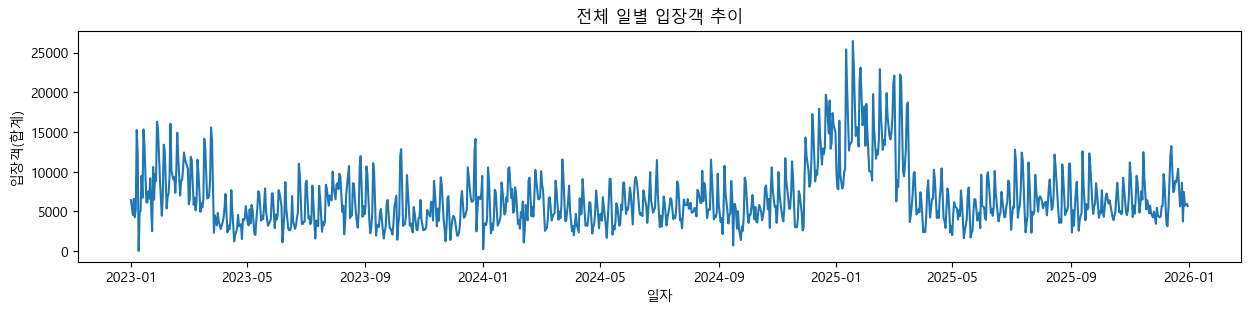

In [18]:
daily = df.groupby("일자")["합계"].sum().sort_index()

plt.figure(figsize=(15,3))
plt.plot(daily.index, daily.values)
plt.title("전체 일별 입장객 추이")
plt.xlabel("일자")
plt.ylabel("입장객(합계)")
plt.show()


C:\Users\Playdata\AppData\Local\Temp\ipykernel_13120\1740676151.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index("일자")["합계"].resample("M").sum()


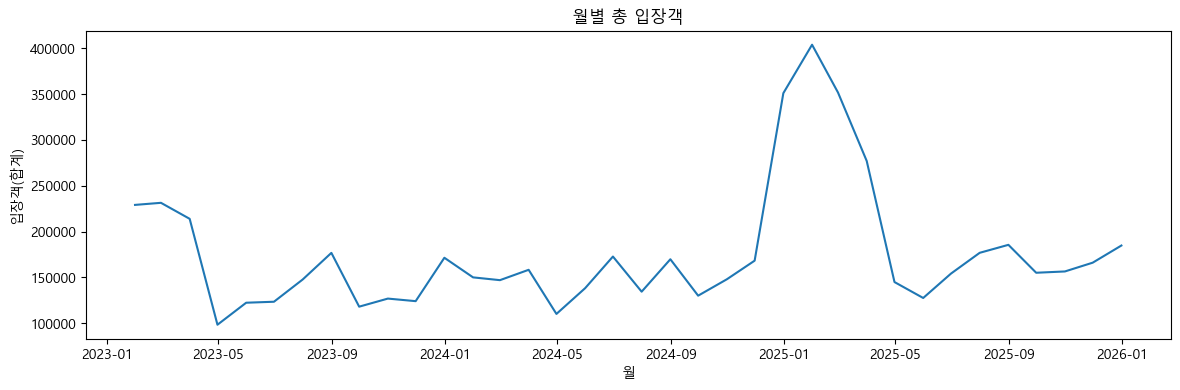

C:\Users\Playdata\AppData\Local\Temp\ipykernel_13120\1740676151.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = df.set_index("일자")["합계"].resample("Y").sum()


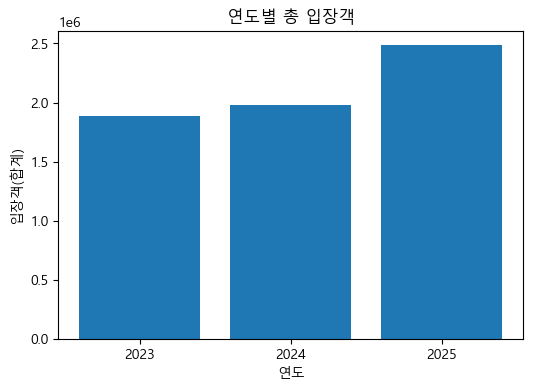

In [19]:
monthly = df.set_index("일자")["합계"].resample("M").sum()

plt.figure(figsize=(14,4))
plt.plot(monthly.index, monthly.values)
plt.title("월별 총 입장객")
plt.xlabel("월")
plt.ylabel("입장객(합계)")
plt.show()


yearly = df.set_index("일자")["합계"].resample("Y").sum()

plt.figure(figsize=(6,4))
plt.bar(yearly.index.year.astype(str), yearly.values)
plt.title("연도별 총 입장객")
plt.xlabel("연도")
plt.ylabel("입장객(합계)")
plt.show()


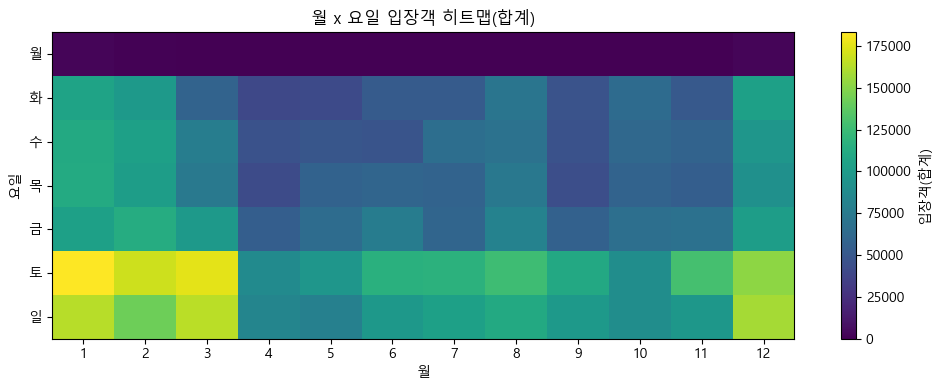

In [22]:
tmp = df.copy()
tmp["연도"] = tmp["일자"].dt.year
tmp["월"] = tmp["일자"].dt.month
tmp["요일번호"] = tmp["일자"].dt.dayofweek

pivot = tmp.pivot_table(index="요일번호", columns="월", values="합계", aggfunc="sum").fillna(0)

plt.figure(figsize=(10,4))
plt.imshow(pivot.values, aspect="auto")
plt.colorbar(label="입장객(합계)")
plt.yticks(range(7), ["월","화","수","목","금","토","일"])
plt.xticks(range(12), list(range(1,13)))
plt.title("월 x 요일 입장객 히트맵(합계)")
plt.xlabel("월")
plt.ylabel("요일")
plt.tight_layout()
plt.show()


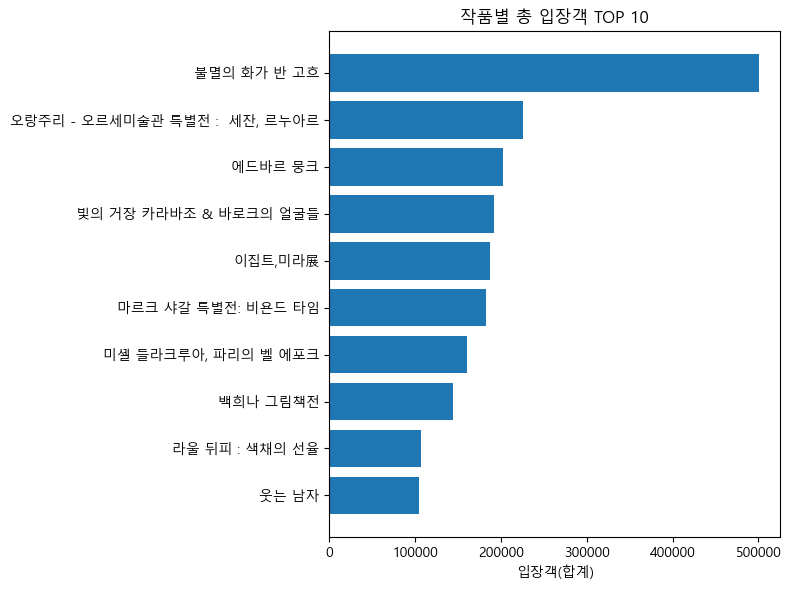

In [24]:
top = df.groupby("작품명")["합계"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
plt.barh(top.index[::-1], top.values[::-1])
plt.title("작품별 총 입장객 TOP 10")
plt.xlabel("입장객(합계)")
plt.tight_layout()
plt.show()
